# **Dataset Description**

## Houses in London

This dataset contains various characteristics and pricing information about houses in London. It consists of 1000 records, reflecting many aspects of each house, from location to interior design. In addition to physical attributes such as address, neighborhood, number of rooms, and square footage, it also includes more specific details like the building's age, presence of a garage, and balcony. Additionally, the price of each house provides valuable information about its market value.

[Link to dataset](https://www.kaggle.com/datasets/oktayrdeki/houses-in-london/data)

### Attribute Description

- **Address**: The address of the house.
- **Neighborhood**: The neighborhood or district where the house is located.
- **Bedrooms**: The number of bedrooms in the house.
- **Bathrooms**: The number of bathrooms in the house.
- **Square Meters**: The total area of the house in square meters.
- **Building Age**: The age of the building, indicating how many years ago it was constructed.
- **Garden**: Indicates whether the house has a garden ("Yes" or "No").
- **Garage**: Indicates whether the house has a garage ("Yes" or "No").
- **Floors**: The total number of floors in the house.
- **Property Type**: The type of property, such as "Apartment" or "House".
- **Heating Type**: The type of heating system used in the house (e.g., "Central Heating", "Gas").
- **Balcony**: Indicates whether the house has a balcony ("Yes" or "No").
- **Interior Style**: The interior style of the house (e.g., "Modern", "Contemporary").
- **View**: The type of view from the house (e.g., "City View", "Sea View").
- **Materials**: The materials used in the construction of the house (e.g., "Brick", "Wood").
- **Building Status**: The current condition of the building (e.g., "New", "Renovated", "Old").
- **Price (£)**: The sale price of the house in British Pounds (£).


In [1]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("oktayrdeki/houses-in-london")

df = pd.read_csv(path + "/london_houses.csv")

In [2]:
def print_unique_values(df):
    for column in df.columns:
        print(f'Attribute: {column}')
        if df[column].dtype == 'object':
            # For categorical data
            unique_values = df[column].unique()
            print(f'Unique values: {unique_values}')
        else:
            # For numeric data
            min_value = df[column].min()
            max_value = df[column].max()
            print(f'Value range: from {min_value} to {max_value}')
        print('-' * 50)

print_unique_values(df)

Attribute: Address
Unique values: ['78 Regent Street' '198 Oxford Street' '18 Regent Street'
 '39 Piccadilly Circus' '116 Fleet Street' '32 Bond Street'
 '197 Baker Street' '86 Fleet Street' '9 Park Lane' '50 Strand'
 '56 Oxford Street' '9 Oxford Street' '139 Fleet Street' '128 Bond Street'
 '62 Baker Street' '10 Regent Street' '37 Bond Street' '192 Bond Street'
 '102 Park Lane' "113 King's Road" '176 Camden High Street'
 '27 Piccadilly Circus' '194 Bond Street' '3 Piccadilly Circus'
 '155 Strand' "131 King's Road" '104 Oxford Street' '98 Strand'
 '104 Piccadilly Circus' '128 Piccadilly Circus' '96 Camden High Street'
 '106 Piccadilly Circus' '60 Park Lane' '193 Oxford Street'
 '135 Piccadilly Circus' '165 Oxford Street' '168 Strand'
 '164 Baker Street' '114 Bond Street' '195 Camden High Street'
 '41 Camden High Street' '50 Oxford Street' '165 Bond Street'
 '174 Piccadilly Circus' "49 King's Road" '138 Strand' "147 King's Road"
 '44 Park Lane' '155 Piccadilly Circus' '110 Strand' '174 

### Justification for Attribute Selection for Clustering

The attributes selected for clustering are those that most significantly impact the physical characteristics of housing and could help identify clusters reflecting different types of houses. The selection process considered factors such as the practical relevance of each attribute and its influence on the market value of the property. Below is the justification for the selection of attributes for clustering and an explanation of why some were excluded.

#### Selected Attributes

**Bedrooms**  
The number of bedrooms is an important criterion for assessing the size of a house. This attribute affects the potential number of residents that can comfortably live in the house.

**Bathrooms**  
The number of bathrooms is a key factor for large families or houses with many residents, as well as an indicator of overall comfort.

**Square Meters**  
The total area of the house is one of the main parameters that determine its value and functionality.

**Building Age**  
The age of the building influences its technical condition and potential need for repairs, which is important for buyers.

**Garden**  
The presence of a garden is a significant additional factor, especially for families with children or nature lovers, enhancing the house's appeal.

**Garage**  
The presence of a garage is an important feature for car owners, providing convenient parking and vehicle storage.

**Floors**  
The number of floors defines the layout of the house and may affect the perception of its space and convenience for residents.

**Property Type**  
The property type, such as an apartment or house, plays a significant role in classifying the housing and targeting the appropriate audience.

#### Excluded Attributes

**Heating Type**  
The type of heating is important for comfort, but it is not crucial for classifying houses based on physical characteristics.

**Interior Style**  
The interior style is subjective and changes depending on the owner's preferences, so it does not provide significant information for clustering houses.

**View**  
The view from the window is an aesthetic parameter but is not critical for classifying houses based on their physical characteristics.

**Materials**  
The materials used in construction may be important for assessing the quality of a house, but they are not significant for clustering in the context of this task.

**Building Status**  
The condition of the building (new, renovated, old) is important for valuation but is less relevant for clustering in this context.

**Price**  
Price is the result of the influence of all other parameters, so using it for clustering may lead to mixing causal relationships.


In [3]:
attributes = [
    'Bedrooms',
    'Bathrooms',
    'Square Meters',
    'Building Age',
    'Garden',
    'Garage',
    'Floors',
    'Property Type'
]

df_filtered = df[attributes]

### **Visualization**

#### PCA (Principal Component Analysis)

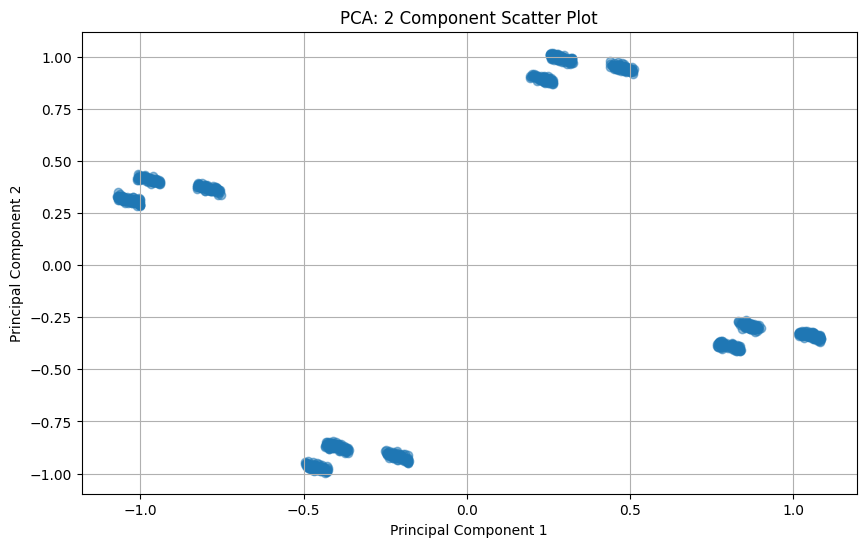

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


categorical_attributes = ['Garden', 'Garage', 'Property Type']
df_filtered = pd.get_dummies(df_filtered, columns=categorical_attributes)

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_filtered)

df_scaled = pd.DataFrame(df_scaled, columns=df_filtered.columns)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

plt.figure(figsize=(10, 6))
plt.scatter(df_pca['Principal Component 1'], df_pca['Principal Component 2'], alpha=0.5)
plt.title('PCA: 2 Component Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


The plot is the result of applying the Principal Component Analysis (PCA) method, which uses two components to reduce the dimensionality of the data. The plot displays the two principal components, which are linear combinations of the original data attributes.

From the visualization, it can be inferred that the optimal number of clusters is either 4 or 12.

#### t-SNE

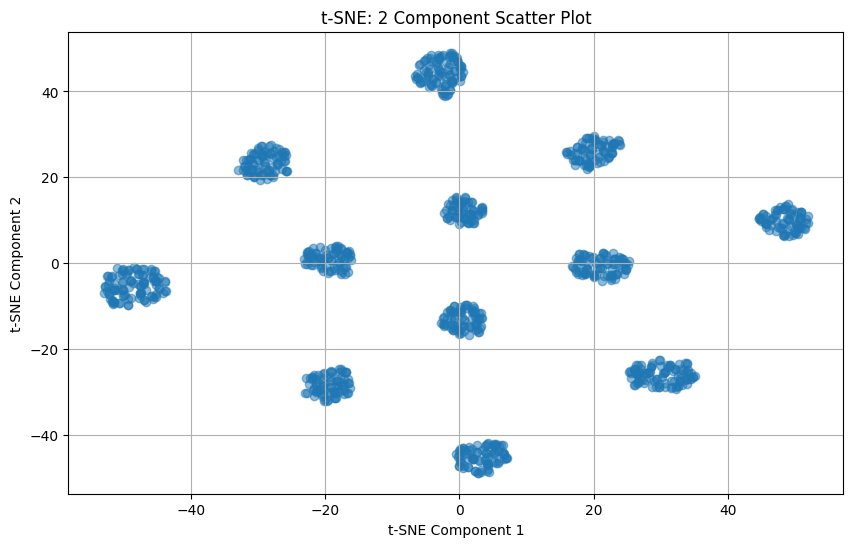

In [5]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(df_scaled)

df_tsne = pd.DataFrame(data=tsne_components, columns=['t-SNE Component 1', 't-SNE Component 2'])

plt.figure(figsize=(10, 6))
plt.scatter(df_tsne['t-SNE Component 1'], df_tsne['t-SNE Component 2'], alpha=0.5)
plt.title('t-SNE: 2 Component Scatter Plot')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()

From the provided plot, it can be inferred that the optimal number of clusters is 12.

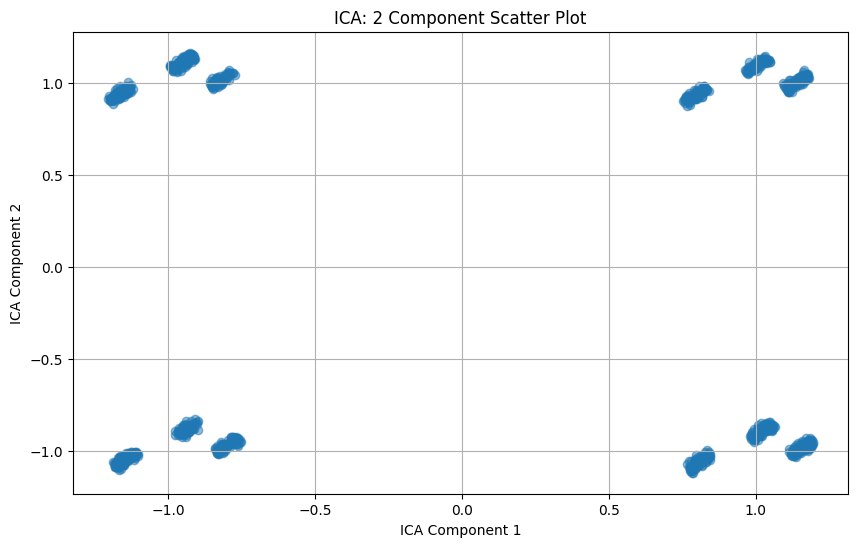

In [6]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=2, random_state=42)
ica_components = ica.fit_transform(df_scaled)

df_ica = pd.DataFrame(data=ica_components, columns=['ICA Component 1', 'ICA Component 2'])

plt.figure(figsize=(10, 6))
plt.scatter(df_ica['ICA Component 1'], df_ica['ICA Component 2'], alpha=0.5)
plt.title('ICA: 2 Component Scatter Plot')
plt.xlabel('ICA Component 1')
plt.ylabel('ICA Component 2')
plt.grid(True)
plt.show()

The ICA (Independent Component Analysis) visualization, like the PCA visualization, suggests that the optimal number of clusters is either 4 or 12.

### **Clustering**

### K-means

To accurately determine the optimal number of clusters, it is necessary to apply the elbow method.

Optimal number of clusters (elbow method): 12


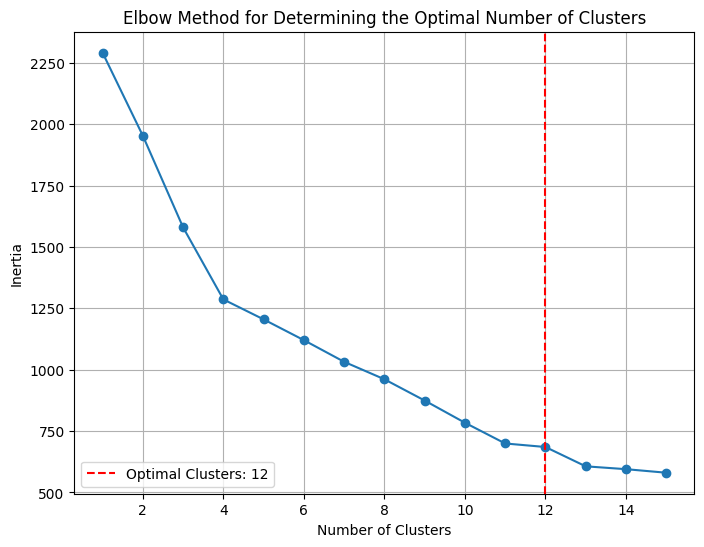

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np


# Elbow method to determine the optimal number of clusters
inertia = []
max_clusters = 15  
for k in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Calculate the first and second differences in inertia
inertia_diff = np.diff(inertia)
inertia_diff2 = np.diff(inertia_diff)

# Find the elbow point where the second derivative is minimal
elbow_point = np.argmin(inertia_diff2) + 2  # Adding 2 because np.diff was applied twice

print(f"Optimal number of clusters (elbow method): {elbow_point}")

# Plotting the graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters+1), inertia, marker='o')
plt.axvline(x=elbow_point, color='r', linestyle='--', label=f'Optimal Clusters: {elbow_point}')
plt.title('Elbow Method for Determining the Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.legend()
plt.show()

The elbow method showed that the optimal number of clusters is 12. This aligns with the assumptions made during the visualization.

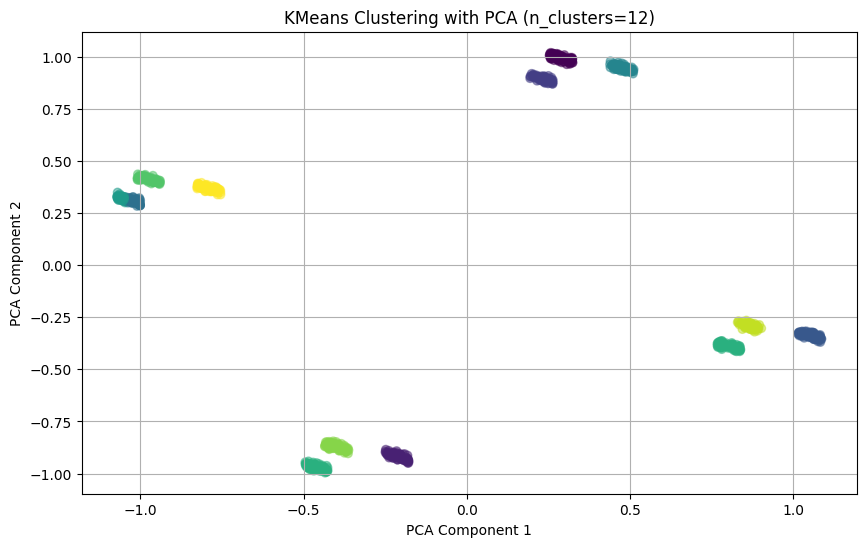

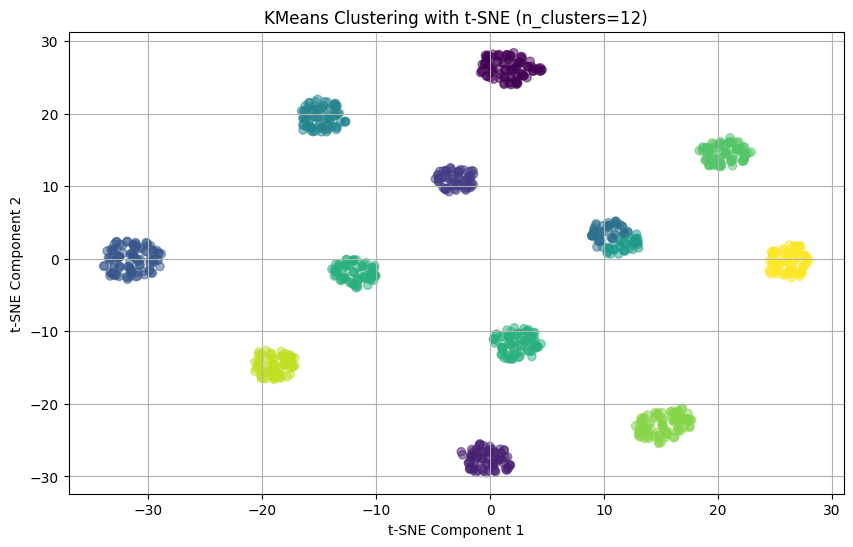

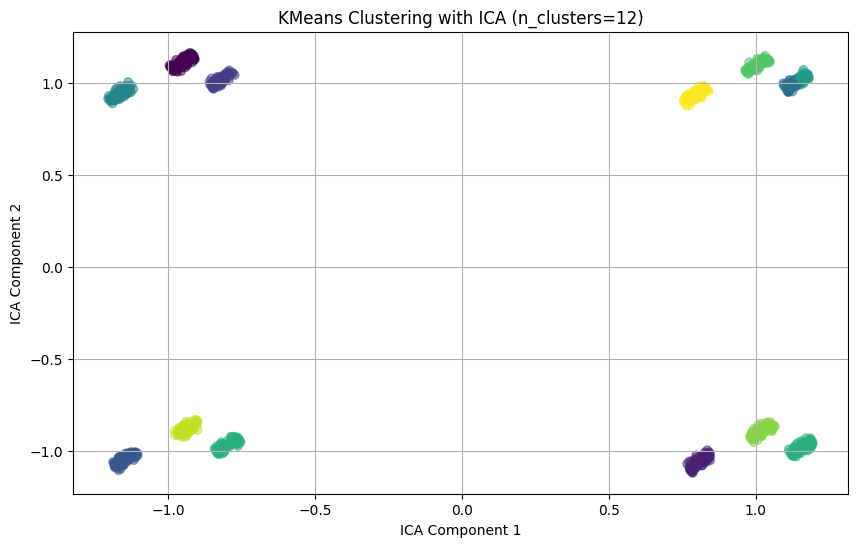

In [8]:
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title(f'KMeans Clustering with PCA (n_clusters={elbow_point})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

# t-SNE for visualization
tsne = TSNE(n_components=2, perplexity=60, random_state=42)
tsne_components = tsne.fit_transform(df_scaled)
df_tsne = pd.DataFrame(data=tsne_components, columns=['t-SNE Component 1', 't-SNE Component 2'])

# Visualization of KMeans clusters with t-SNE
plt.figure(figsize=(10, 6))
plt.scatter(df_tsne['t-SNE Component 1'], df_tsne['t-SNE Component 2'], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title(f'KMeans Clustering with t-SNE (n_clusters={elbow_point})')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()


# ICA for visualization
ica = FastICA(n_components=2, random_state=42)
ica_components = ica.fit_transform(df_scaled)


plt.figure(figsize=(10, 6))
plt.scatter(ica_components[:, 0], ica_components[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title(f'KMeans Clustering with ICA (n_clusters={elbow_point})')
plt.xlabel('ICA Component 1')
plt.ylabel('ICA Component 2')
plt.grid(True)
plt.show()

As you can see, the clustering was not done perfectly. Two different clusters merged into one and vice versa, one split into two different ones.

You can try to perform clustering with 4 clusters.

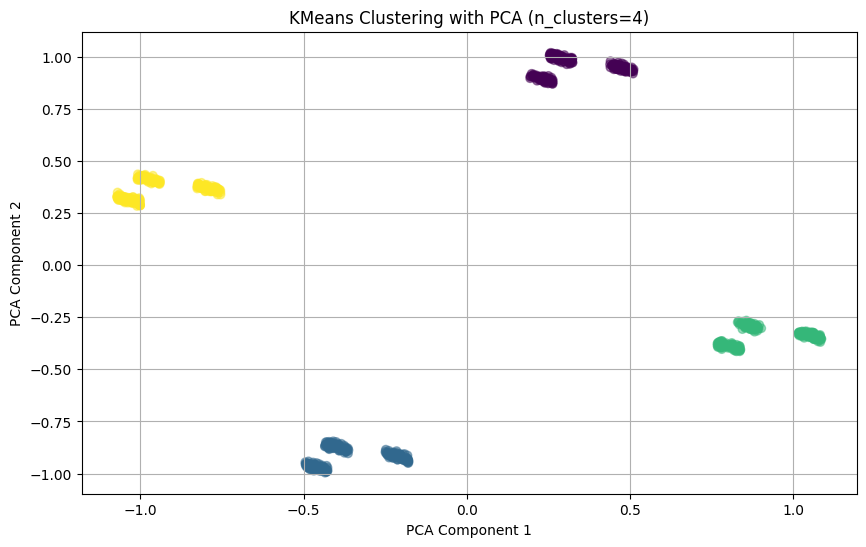

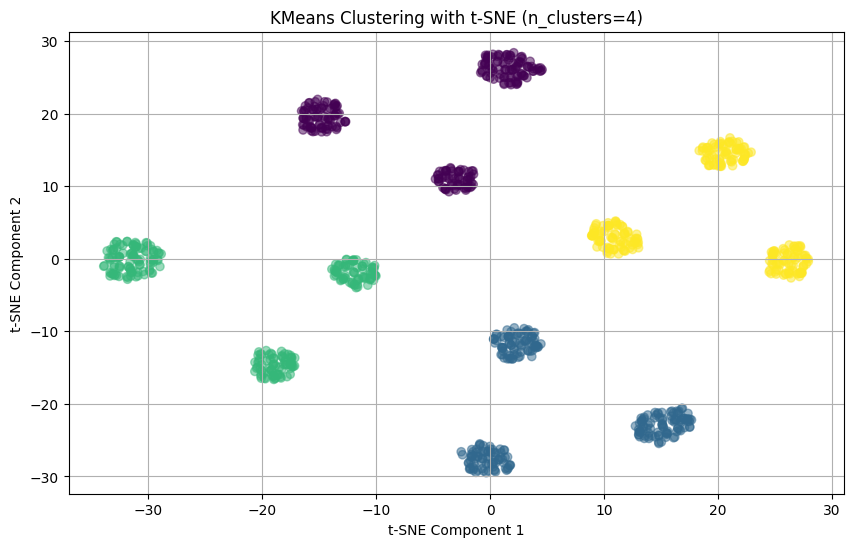

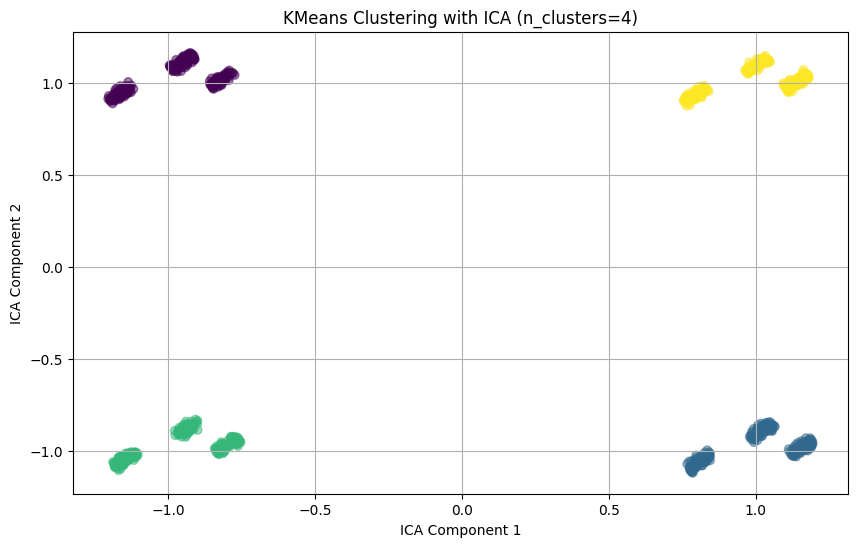

In [9]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title(f'KMeans Clustering with PCA (n_clusters=4)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

# t-SNE for visualization
tsne = TSNE(n_components=2, perplexity=60, random_state=42)
tsne_components = tsne.fit_transform(df_scaled)
df_tsne = pd.DataFrame(data=tsne_components, columns=['t-SNE Component 1', 't-SNE Component 2'])

# Visualization of KMeans clusters with t-SNE
plt.figure(figsize=(10, 6))
plt.scatter(df_tsne['t-SNE Component 1'], df_tsne['t-SNE Component 2'], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title(f'KMeans Clustering with t-SNE (n_clusters=4)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()


# ICA for visualization
ica = FastICA(n_components=2, random_state=42)
ica_components = ica.fit_transform(df_scaled)


plt.figure(figsize=(10, 6))
plt.scatter(ica_components[:, 0], ica_components[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title(f'KMeans Clustering with ICA (n_clusters=4)')
plt.xlabel('ICA Component 1')
plt.ylabel('ICA Component 2')
plt.grid(True)
plt.show()

As you can see, clustering into 4 clusters works more correctly. However, clustering into 4 clusters itself in this case is more "rough" and not accurate.

### DBSCAN

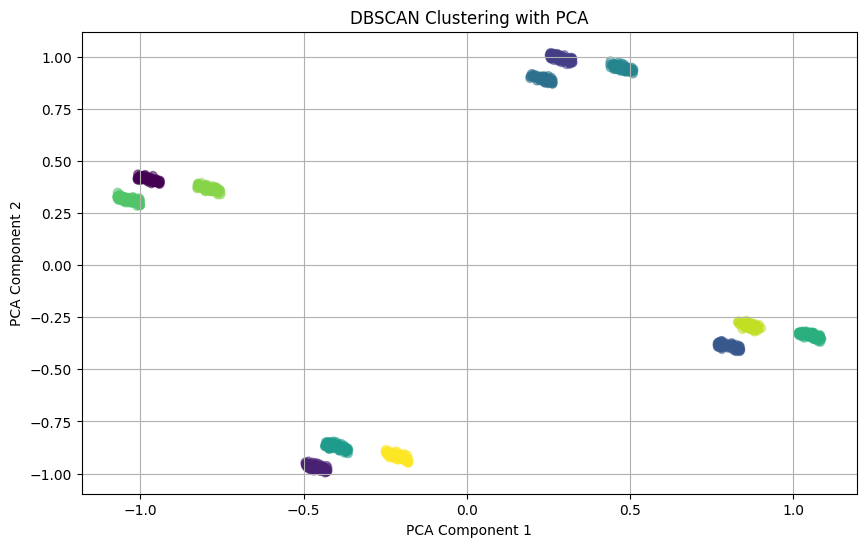

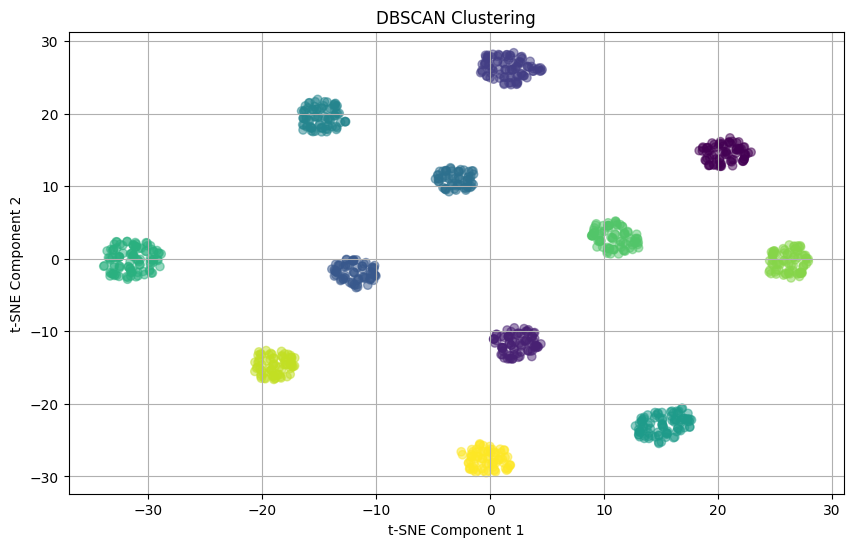

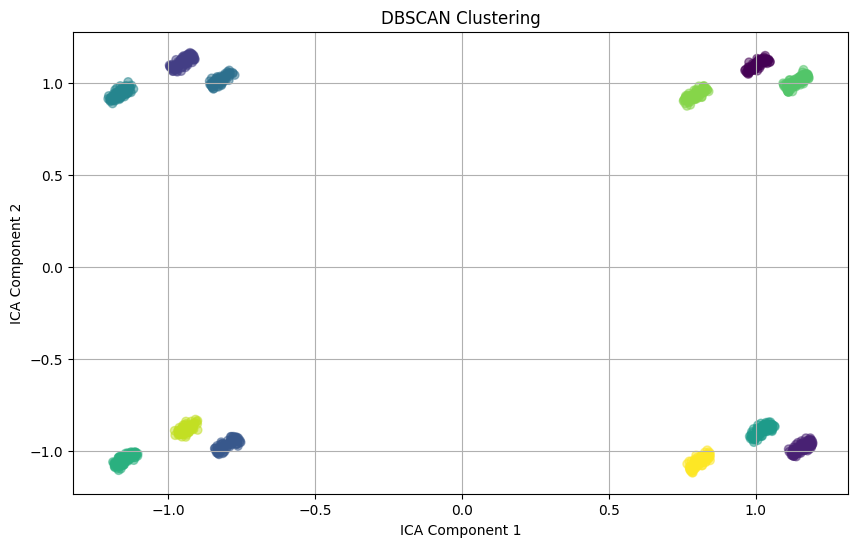

In [10]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.5)
plt.title(f'DBSCAN Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

# t-SNE for visualization
tsne = TSNE(n_components=2, perplexity=60, random_state=42)
tsne_components = tsne.fit_transform(df_scaled)
df_tsne = pd.DataFrame(data=tsne_components, columns=['t-SNE Component 1', 't-SNE Component 2'])

# Visualization of KMeans clusters with t-SNE
plt.figure(figsize=(10, 6))
plt.scatter(df_tsne['t-SNE Component 1'], df_tsne['t-SNE Component 2'], c=dbscan_labels, cmap='viridis', alpha=0.5)
plt.title(f'DBSCAN Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()


# ICA for visualization
ica = FastICA(n_components=2, random_state=42)
ica_components = ica.fit_transform(df_scaled)


plt.figure(figsize=(10, 6))
plt.scatter(ica_components[:, 0], ica_components[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.5)
plt.title(f'DBSCAN Clustering')
plt.xlabel('ICA Component 1')
plt.ylabel('ICA Component 2')
plt.grid(True)
plt.show()


The DBSCAN method also divided into 12 clusters. Moreover, it did this much better and more accurately than the K-means method.

### Agglomerative Clustering

Number of clusters for Agglomerative Clustering: 12


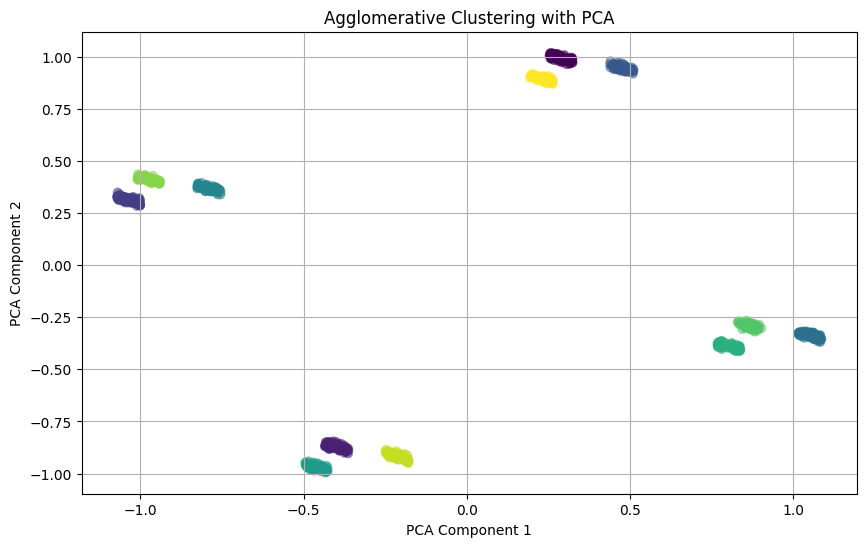

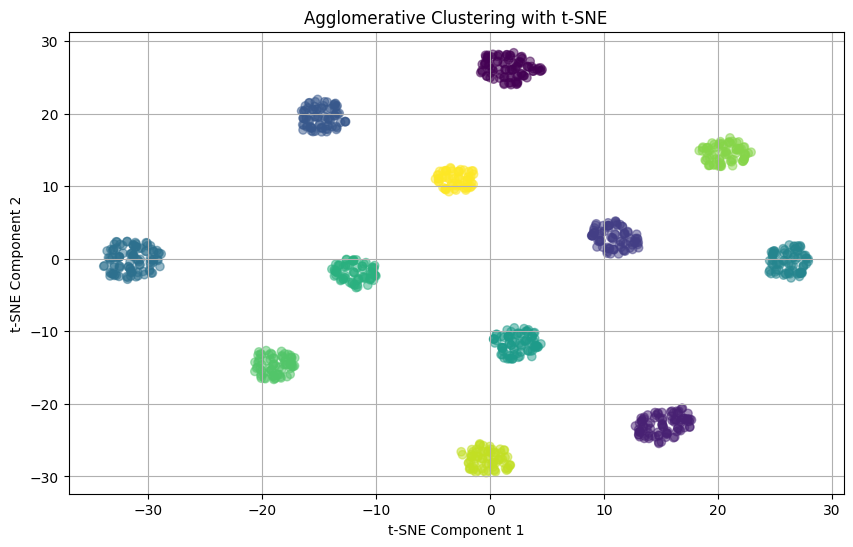

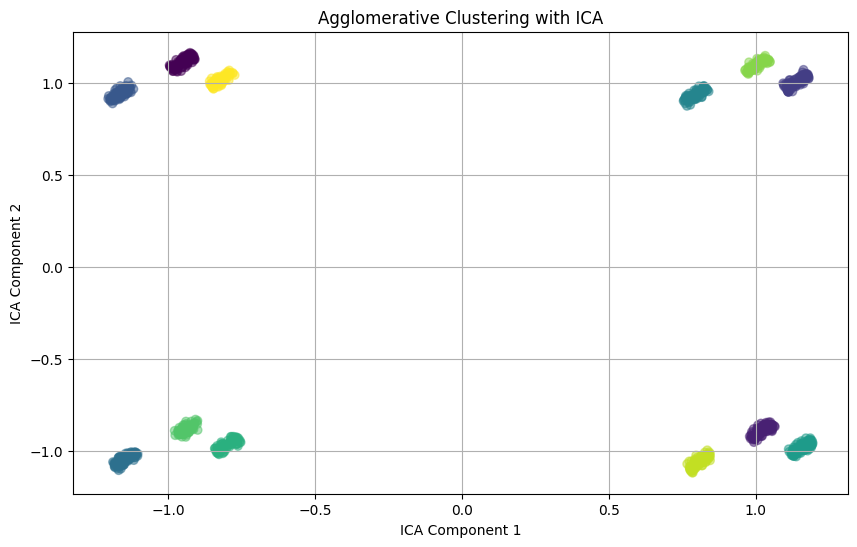

In [11]:
from sklearn.cluster import AgglomerativeClustering

# Clustering using Agglomerative Clustering as a grid-based method
# Define parameters for agglomerative clustering
n_clusters = 12  # Number of clusters can be determined using the elbow method or silhouette score
agglomerative_model = AgglomerativeClustering(n_clusters=n_clusters)
agglomerative_labels = agglomerative_model.fit_predict(df_scaled)

# Number of clusters
n_clusters_agglomerative = len(set(agglomerative_labels))
print(f"Number of clusters for Agglomerative Clustering: {n_clusters_agglomerative}")

# Visualization with PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=agglomerative_labels, cmap='viridis', alpha=0.5)
plt.title('Agglomerative Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

# t-SNE for visualization
tsne = TSNE(n_components=2, perplexity=60, random_state=42)
tsne_components = tsne.fit_transform(df_scaled)
df_tsne = pd.DataFrame(data=tsne_components, columns=['t-SNE Component 1', 't-SNE Component 2'])

plt.figure(figsize=(10, 6))
plt.scatter(df_tsne['t-SNE Component 1'], df_tsne['t-SNE Component 2'], c=agglomerative_labels, cmap='viridis', alpha=0.5)
plt.title('Agglomerative Clustering with t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()

# ICA for visualization
ica = FastICA(n_components=2, random_state=42)
ica_components = ica.fit_transform(df_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(ica_components[:, 0], ica_components[:, 1], c=agglomerative_labels, cmap='viridis', alpha=0.5)
plt.title('Agglomerative Clustering with ICA')
plt.xlabel('ICA Component 1')
plt.ylabel('ICA Component 2')
plt.grid(True)
plt.show()

Using Agglomerative Clustering, 12 clusters were identified. Visually, it seems that DBSCAN and Agglomerative Clustering performed equally well in clustering. Agglomerative Clustering also performed significantly better than K-means.

### Gaussian Mixture

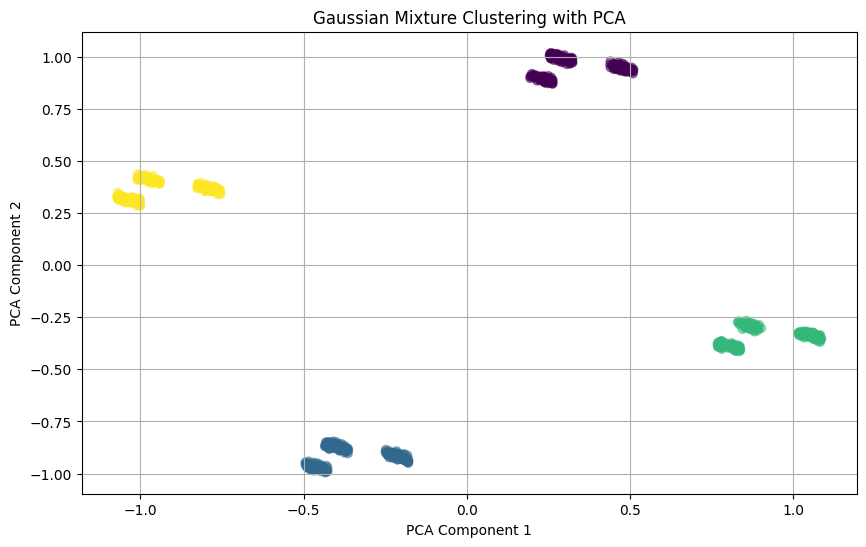

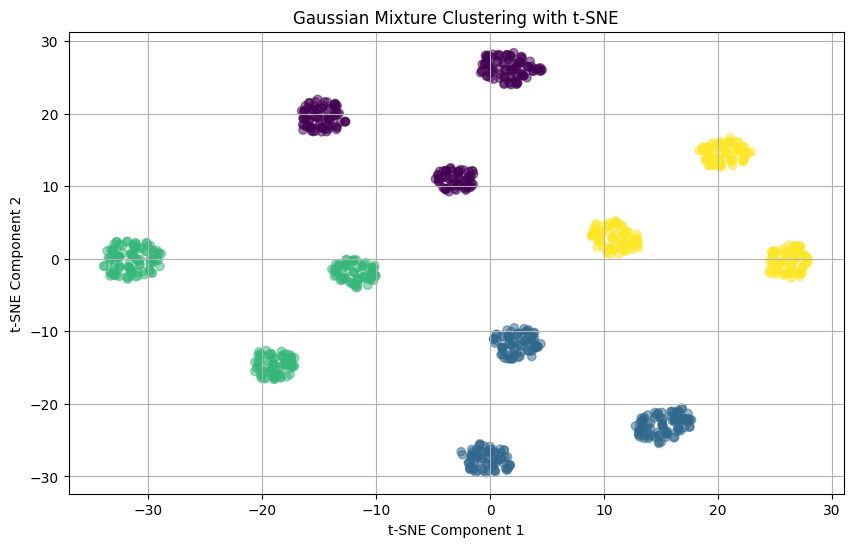

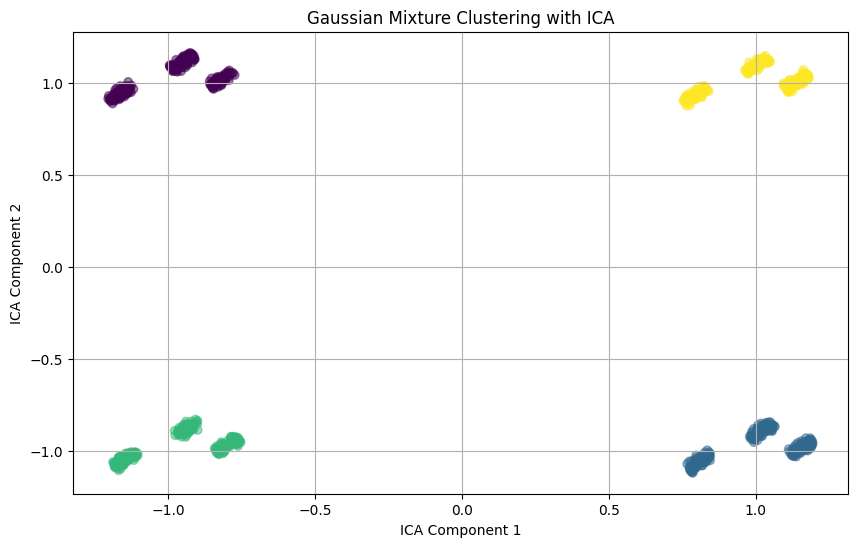

In [12]:
from sklearn.mixture import GaussianMixture

# Clustering using Gaussian Mixture (model-based)
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(df_scaled)

# Visualization with PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=gmm_labels, cmap='viridis', alpha=0.5)
plt.title('Gaussian Mixture Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

# t-SNE for visualization
tsne = TSNE(n_components=2, perplexity=60, random_state=42)
tsne_components = tsne.fit_transform(df_scaled)
df_tsne = pd.DataFrame(data=tsne_components, columns=['t-SNE Component 1', 't-SNE Component 2'])

plt.figure(figsize=(10, 6))
plt.scatter(df_tsne['t-SNE Component 1'], df_tsne['t-SNE Component 2'], c=gmm_labels, cmap='viridis', alpha=0.5)
plt.title('Gaussian Mixture Clustering with t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()

# ICA for visualization
ica = FastICA(n_components=2, random_state=42)
ica_components = ica.fit_transform(df_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(ica_components[:, 0], ica_components[:, 1], c=gmm_labels, cmap='viridis', alpha=0.5)
plt.title('Gaussian Mixture Clustering with ICA')
plt.xlabel('ICA Component 1')
plt.ylabel('ICA Component 2')
plt.grid(True)
plt.show()

The Gaussian Mixture method performed significantly worse than DBSCAN and Agglomerative Clustering. Instead of 12 clusters, the Gaussian Mixture method only produced 4. In fact, the Gaussian Mixture worked like K-means with 4 clusters. Therefore, the result of the Gaussian Mixture cannot be considered better.

### **Analysis of the results**

In [13]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


# Function to compute metrics
def compute_metrics(labels, data):
    silhouette = silhouette_score(data, labels)
    calinski_harabasz = calinski_harabasz_score(data, labels)
    davies_bouldin = davies_bouldin_score(data, labels)
    return silhouette, calinski_harabasz, davies_bouldin

# Compute metrics for each clustering method
metrics_kmeans = compute_metrics(kmeans_labels, df_scaled)
metrics_dbscan = compute_metrics(dbscan_labels, df_scaled)
metrics_agg = compute_metrics(agglomerative_labels, df_scaled)
metrics_gmm = compute_metrics(gmm_labels, df_scaled)

# Display the metrics
print("Metrics for K-means:")
print(f"Silhouette Score: {metrics_kmeans[0]}")
print(f"Calinski-Harabasz Index: {metrics_kmeans[1]}")
print(f"Davies-Bouldin Index: {metrics_kmeans[2]}")

print("\nMetrics for DBSCAN:")
print(f"Silhouette Score: {metrics_dbscan[0]}")
print(f"Calinski-Harabasz Index: {metrics_dbscan[1]}")
print(f"Davies-Bouldin Index: {metrics_dbscan[2]}")

print("\nMetrics for Agglomerative Clustering:")
print(f"Silhouette Score: {metrics_agg[0]}")
print(f"Calinski-Harabasz Index: {metrics_agg[1]}")
print(f"Davies-Bouldin Index: {metrics_agg[2]}")

print("\nMetrics for Gaussian Mixture:")
print(f"Silhouette Score: {metrics_gmm[0]}")
print(f"Calinski-Harabasz Index: {metrics_gmm[1]}")
print(f"Davies-Bouldin Index: {metrics_gmm[2]}")

Metrics for K-means:
Silhouette Score: 0.2645303538657118
Calinski-Harabasz Index: 259.3798443476369
Davies-Bouldin Index: 1.596697550525092

Metrics for DBSCAN:
Silhouette Score: 0.3951378485401117
Calinski-Harabasz Index: 241.7110284227447
Davies-Bouldin Index: 1.1000420225979184

Metrics for Agglomerative Clustering:
Silhouette Score: 0.3951378485401117
Calinski-Harabasz Index: 241.71102842274476
Davies-Bouldin Index: 1.1000420225979184

Metrics for Gaussian Mixture:
Silhouette Score: 0.2645303538657118
Calinski-Harabasz Index: 259.3798443476369
Davies-Bouldin Index: 1.596697550525092


DBSCAN and Agglomerative Clustering show better results in terms of Silhouette Score and Davies-Bouldin Index, indicating better internal cohesion of clusters and their clearer separation from each other compared to other methods.

K-means and Gaussian Mixture have similar results, with relatively low Silhouette Score and high Davies-Bouldin Index, indicating that these methods do not do as well in detecting natural clusters in this dataset.

For this dataset, if the goal is to obtain clearly separated clusters with good internal cohesion, DBSCAN and Agglomerative Clustering are more effective methods compared to K-means and Gaussian Mixture.

The analysis of the metrics showed that, in general, the assumptions made based on the visualization of the clustering results (after the implementation of each method) were confirmed.